In [91]:
import psycopg2
import pandas as pd
from toolbox import DatabaseInterface
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns


databaseInterface = DatabaseInterface()
def load_data(query):
    return(databaseInterface.select(query))

In [92]:
query_city = """
    SELECT article_date, city
    FROM articles
    JOIN contents ON articles.id = contents.article_id
    JOIN content_cities ON contents.id = content_cities.content_id
    ORDER BY article_date
    ;
    """
df_city = load_data(query_city)

In [93]:
df_city["city"] = df_city["city"].str.capitalize()

In [94]:
df_city["city"].unique()

array(['Odessa', 'Lviv', 'Kherson', 'Kharkiv', 'Donetsk', 'Simferopol',
       'Sloviansk', 'Horlivka', 'Kyiv', 'Yalta', 'Ternopil', 'Melitopol',
       'Brovary', 'Buchach', 'Irpin', 'Chernihiv', 'Poltava', 'Mariupol',
       'Borodyanka', 'Korosten', 'Drohobych', 'Okhtyrka', 'Pokrov',
       'Bucha', 'Kreminna', 'Fontanka', 'Rivne', 'Lyman', 'Fastiv',
       'Pavlohrad', 'Saky', 'Kakhovka', 'Berehove', 'Borova', 'Smila',
       'Cherkasy', 'Tokmak', 'Luka'], dtype=object)

In [95]:
df_city = df_city[
    (df_city['article_date'] >= "2022-01-01")
    & (df_city['article_date'] <= "2023-01-01")]

In [96]:
df_city.groupby(["city"]).count().sort_values("article_date", ascending=False).reset_index()

,city,article_date
0,Kharkiv,699
1,Kherson,609
2,Lviv,228
3,Odessa,214
4,Sloviansk,143
5,Donetsk,113
6,Lyman,92
7,Melitopol,63
8,Kyiv,57
9,Kakhovka,47


In [97]:
df_city["city"].value_counts()

Kharkiv       699
Kherson       609
Lviv          228
Odessa        214
Sloviansk     143
Donetsk       113
Lyman          92
Melitopol      63
Kyiv           57
Kakhovka       47
Irpin          42
Ternopil       27
Kreminna       27
Poltava        20
Saky           17
Mariupol       16
Rivne          15
Simferopol     14
Brovary        10
Korosten        9
Yalta           6
Bucha           5
Okhtyrka        5
Pokrov          3
Fontanka        3
Drohobych       3
Fastiv          3
Borodyanka      3
Chernihiv       3
Borova          3
Smila           3
Berehove        2
Cherkasy        2
Pavlohrad       1
Buchach         1
Name: city, dtype: int64

In [98]:
df_city

,article_date,city
52,2022-01-20 10:21:00,Yalta
53,2022-01-24 05:29:00,Kharkiv
54,2022-01-31 08:38:00,Kharkiv
55,2022-02-14 04:02:00,Lviv
56,2022-02-18 10:42:00,Donetsk
...,...,...
2555,2022-12-31 15:05:00,Kherson
2556,2022-12-31 17:37:00,Kharkiv
2557,2022-12-31 17:37:00,Kyiv
2558,2022-12-31 21:58:00,Kyiv


In [104]:
def countplot(df: pd.DataFrame, feature: str):
    chart = sns.countplot(df, x=feature, order=df[feature].value_counts().index)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=60, horizontalalignment='right')
    sns.set(rc={'figure.figsize':(10,5)});

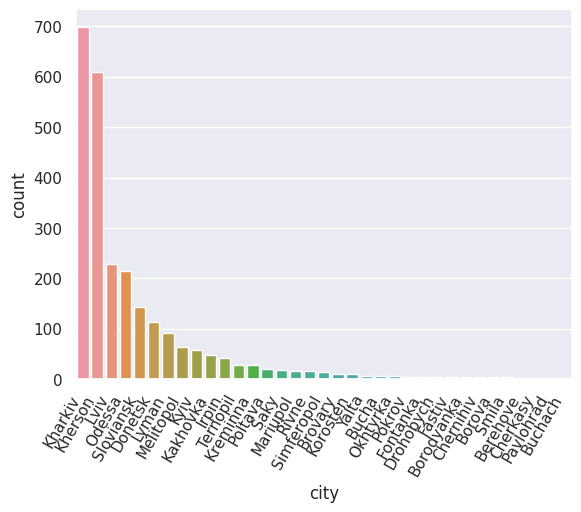

In [105]:
countplot(df_city, "city")

In [108]:
query = "SELECT * FROM articles;"
articles = load_data(query)
articles

,id,journal,title,article_date,link
0,1,le monde,Les candidats à l’élection présidentielle crit...,2021-02-03 12:38:00,https://www.lemonde.fr/election-presidentielle...
1,2,le monde,Crise en Ukraine : la France et l’Allemagne ap...,2022-03-08 13:38:00,https://www.lemonde.fr/international/live/2022...
2,3,le monde,Nouvel An 2022 : Emmanuel Macron adresse ses v...,2022-03-02 18:19:00,https://www.lemonde.fr/international/live/2021...
3,4,le monde,"Guerre en Ukraine, en direct : le sort des com...",2022-05-19 09:55:00,https://www.lemonde.fr/international/live/2022...
4,5,le monde,"Guerre en Ukraine, en direct : l’ambassade des...",2022-05-18 20:57:00,https://www.lemonde.fr/international/live/2022...
...,...,...,...,...,...
8402,8402,le monde,"Joe Biden condamne les profits excessifs, sans...",2023-03-09 09:17:00,https://www.lemonde.fr/economie/article/2023/0...
8403,8403,le monde,"En Géorgie, le parti au pouvoir retire sa « lo...",2023-03-09 10:54:00,https://www.lemonde.fr/international/article/2...
8404,8404,le monde,"En Géorgie, un fragile rêve européen",2023-03-09 11:30:00,https://www.lemonde.fr/idees/article/2023/03/0...
8405,8405,le monde,Moldavie : l’Union européenne multiplie les ge...,2023-03-09 11:51:00,https://www.lemonde.fr/international/article/2...


In [119]:
date_min = min(articles["article_date"])
date_min.to_pydatetime()

datetime.datetime(1960, 5, 25, 0, 0)

In [116]:
datetime.fromtimestamp(date_min)

TypeError: 'Timestamp' object cannot be interpreted as an integer

In [111]:
datetime(2023, 12, 31)

datetime.datetime(2023, 12, 31, 0, 0)